# First Exploration of Fits Files of Monocam
================================================================

- date of creation : Thursday 26th 2016
- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS

Study images for LSST calibration group

In [34]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
#config InlineBackend.rc = {}
#config Backend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")  # default config obtained from astropy examples
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
from astropy.utils.data import download_file

In [36]:
from astropy.io import fits

In [37]:
import os

In [38]:
path='/Users/dagoret-campagnesylvie/iraf/MonoCamMay2016/20160509'

In [39]:
filename='bias_01.fits'

In [40]:
image_file=os.path.join(path,filename)

In [41]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /Users/dagoret-campagnesylvie/iraf/MonoCamMay2016/20160509/bias_01.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     554   ()              
1                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
2                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
3                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
4                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
5                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
6                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
7                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
8                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
9                ImageHDU        33   (544, 2048)   int16 (rescales to uint16)   
10               ImageHDU        33   (544, 2048)   int16 (rescales

In [42]:
image_data1 = hdu_list[1].data

In [43]:
image_data1.shape

(2048, 544)

In [44]:
hdu_list.close()

In [45]:
image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)

<type 'numpy.ndarray'>
(2048, 544)


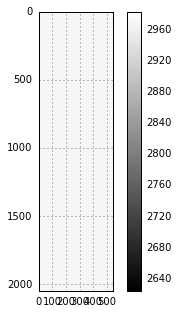

In [46]:
# Viewing the image data and getting basic statistics
plt.figure(figsize=(5,5))
plt.imshow(image_data1, cmap='gray')
plt.colorbar()

# To see more color maps
# http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps


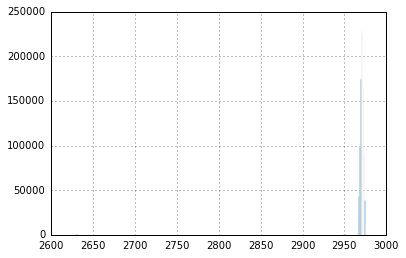

In [47]:
image_data2=image_data1.flatten()
plt.hist(image_data2,bins=1000);